## Class 를 이용하여선형회귀 구현

In [1]:
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

np.random.seed(0)

In [2]:
# 수치미분

def numerical_derivative(f, x):
    delta_x = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    
    while not it.finished:
        idx = it.multi_index        
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x) # f(x+delta_x)
        
        x[idx] = float(tmp_val) - delta_x 
        fx2 = f(x) # f(x-delta_x)
        grad[idx] = (fx1 - fx2) / (2*delta_x)
        
        x[idx] = tmp_val 
        it.iternext()   
        
    return grad

In [3]:
class LinearRegressionTest:
    
    # constructor
    def __init__(self):       
                
        print("LinearRegressionTest Object is created")
        
    # obtain current W and current b
    def get_W_b(self):
        
        return self.W, self.b
    
    
    # loss function
    def loss_func(self, xdata, tdata):
                
        y = np.dot(xdata, self.W) + self.b
    
        return ( np.sum( (tdata - y)**2 ) ) / ( len(xdata) )
        
    
    # display current error value
    def error_val(self, xdata, tdata):
        
        y = np.dot(xdata, self.W) + self.b
    
        return ( np.sum( (tdata - y)**2 ) ) / ( len(xdata) )
    
    
    # predict method
    def predict(self, test_data):
        
        y = np.dot(test_data, self.W) + self.b
        
        return y
    

    def display_lossval_trend(self):
        
        plt.title('Loss Value Trend')
        plt.xlabel('epochs ( X 1000)')
        plt.ylabel('loss value')
        plt.grid()

        label_str = 'lr=' + str(self.learning_rate) + ', epoch=' + str(self.iteration_count)
        
        plt.plot(self.loss_val_list, ls='--', lw=2, color='r', label=label_str)
        plt.legend(loc='best')

        plt.show()
        
        
    # train method
    def train(self, xdata, tdata, learning_rate, iteration_count):
        
        self.W = np.random.rand(xdata.shape[-1], 1)
        self.b = np.random.rand(1)
        self.learning_rate = learning_rate
        self.iteration_count = iteration_count
        
        self.loss_val_list = []
    
        f = lambda x : self.loss_func(xdata, tdata)

        start_time = datetime.now()
        
        for step in  range(iteration_count):  
    
            self.W -= learning_rate * numerical_derivative(f, self.W)
    
            self.b -= learning_rate * numerical_derivative(f, self.b)
    
            if (step % 1000 == 0):  
            
                current_loss_val = self.error_val(xdata, tdata)
                print("step = ", step, "error value = ", current_loss_val)
                self.loss_val_list.append(current_loss_val)
                
        end_time = datetime.now()
        
        print("")
        print("Elapsed Time => ", end_time - start_time)

In [4]:
try:
    
    loaded_data = np.loadtxt('./sps.csv', delimiter=',', dtype=np.float32)

    x_data = loaded_data[ :, 1:]
    t_data = loaded_data[ :, [0]]

    # 데이터 차원 및 shape 확인
    print("x_data.ndim = ", x_data.ndim, ", x_data.shape = ", x_data.shape)
    print("t_data.ndim = ", t_data.ndim, ", t_data.shape = ", t_data.shape) 

except FileNotFoundError as err:
    print(str(err))
    
except Exception as err:
    print(str(err))

x_data.ndim =  2 , x_data.shape =  (50, 4)
t_data.ndim =  2 , t_data.shape =  (50, 1)


### learning_rate = 1e-3,  반복횟수 20,000번 수행하는 obj1

In [5]:
obj1 = LinearRegressionTest()

obj1.train(x_data, t_data, 1e-3, 20001)

LinearRegressionTest Object is created
step =  0 error value =  60.604776072341444
step =  1000 error value =  0.004047845907167936
step =  2000 error value =  0.00048722369128301977
step =  3000 error value =  5.864524808192556e-05
step =  4000 error value =  7.0589037112171215e-06
step =  5000 error value =  8.496531813563435e-07
step =  6000 error value =  1.0226949652836696e-07
step =  7000 error value =  1.230978727513882e-08
step =  8000 error value =  1.4816819081469759e-09
step =  9000 error value =  1.7834437166114527e-10
step =  10000 error value =  2.1466628382414438e-11
step =  11000 error value =  2.583855772566766e-12
step =  12000 error value =  3.1100881478795545e-13
step =  13000 error value =  3.7434938904037783e-14
step =  14000 error value =  4.5059000875171345e-15
step =  15000 error value =  5.423579204531311e-16
step =  16000 error value =  6.528154409141282e-17
step =  17000 error value =  7.857690960008845e-18
step =  18000 error value =  9.458002967175832e-19


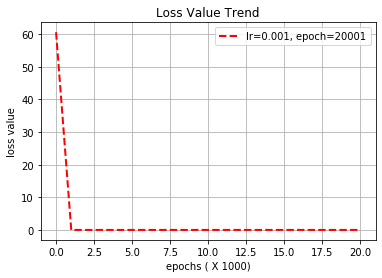

In [6]:
obj1.display_lossval_trend()

In [7]:
test_data = np.array([ [4, 4, 4, 4], [-3, 0, 9, -1], [-7, -9, -2, 8], [1, -2, 3, -2], [19, -12, 0, -76], [2001, -1, 109, 31], [-1, 102, -200 , 1000] ])

for data in test_data:
    print(obj1.predict(data)) 

[-1.68609189e-11]
[7.]
[-8.]
[8.]
[107.]
[2079.99999996]
[-1303.00000001]


In [8]:
print(obj1.get_W_b())

(array([[ 1.],
       [-1.],
       [ 1.],
       [-1.]]), array([1.58863405e-10]))
